In [1]:
import numpy as np
import sys
import os
import pickle as pkl

pickle_path = "./xp"
import numpy as np
import matplotlib.pyplot as plt
from Extreme import GenericMAB as GM

plt.rcParams["text.usetex"] = True
plt.rcParams.update({"font.size": 26})

In [4]:
xp1 = {
    "arms": ["Par"] * 5,
    "coef": [[2.1, 1], [2.3, 1], [1.3, 1], [1.1, 1], [1.9, 1]],
}  # xp 1 from Bhatt et al.
xp2 = {
    "arms": ["Par"] * 7,
    "coef": [[2.5, 1], [2.8, 1], [4, 1], [3, 1], [1.4, 1], [1.9, 1], [1.4, 1.1]],
}  # xp 2 from Bhatt et al.
xp3 = {
    "arms": ["Exp"] * 10,
    "coef": [2.1, 2.4, 1.9, 1.3, 1.1, 2.9, 1.5, 2.2, 2.6, 1.4],
}  # xp 3 from Bhatt et al.
xp4 = {
    "arms": ["G"] * 20,
    "coef": [
        [1, sig]
        for sig in [
            1.64,
            2.29,
            1.79,
            2.67,
            1.70,
            1.36,
            1.90,
            2.19,
            0.80,
            0.12,
            1.65,
            1.19,
            1.88,
            0.89,
            3.35,
            1.5,
            2.22,
            3.03,
            1.08,
            0.48,
        ]
    ],
}  # xp 3 from Bhatt et al.
xp5 = {
    "arms": ["Par"] * 3,
    "coef": [[5, 1], [1.1, 1], [2, 1]],
}  # xp 1 from Carpentier et Valko
xp6 = {
    "arms": ["Par"] * 2 + ["Mixture"],
    "coef": [[1.5, 1], [3, 1], [("Dirac", "Par"), (0.8, 0.2), (0, [1.1, 1])]],
}  # xp 2 from Carpentier & Valko
xp7 = {"arms": ["LG"] * 5, "coef": [[1, 4], [1.5, 3], [2, 2], [3, 1], [3.5, 0.5]]}
xp8 = {"arms": ["GenNorm"] * 8, "coef": [0.2 * i for i in range(1, 9)]}

xp9 = {
    "arms": ["NegExp"] * 10,
    "coef": [0.5, 0.5, 1.0, 0.5, 0.1, 0.6, 0.5, 0.2, 0.6, 0.4],
}

xp10 = {
    "arms": ["Power"] * 10,
    "coef": [3, 3, 3, 4, 4, 4, 5, 5, 5, 6],
}

xp11 = {
    "arms": ["GenPower"] * 5,
    "coef": [[3, 1.01], [4, 1.01], [5, 1.01], [5, 1.1], [4, 1]],
}


xp_list = [
    xp1,
    xp2,
    xp3,
    xp4,
    xp5,
    xp6,
    xp7,
    xp8,
    xp9,
    xp10,
    xp11,
]  # , xp2, xp3, xp4, xp5, xp6, xp7, xp8]
names_xp = ["xp" + str(i + 1) + "_" for i in range(11)]

T_list = [50, 100, 200, 500, 1000, 2000]

In [5]:
T = T_list[2]
# xp = xp_list[3]
Trials = 100

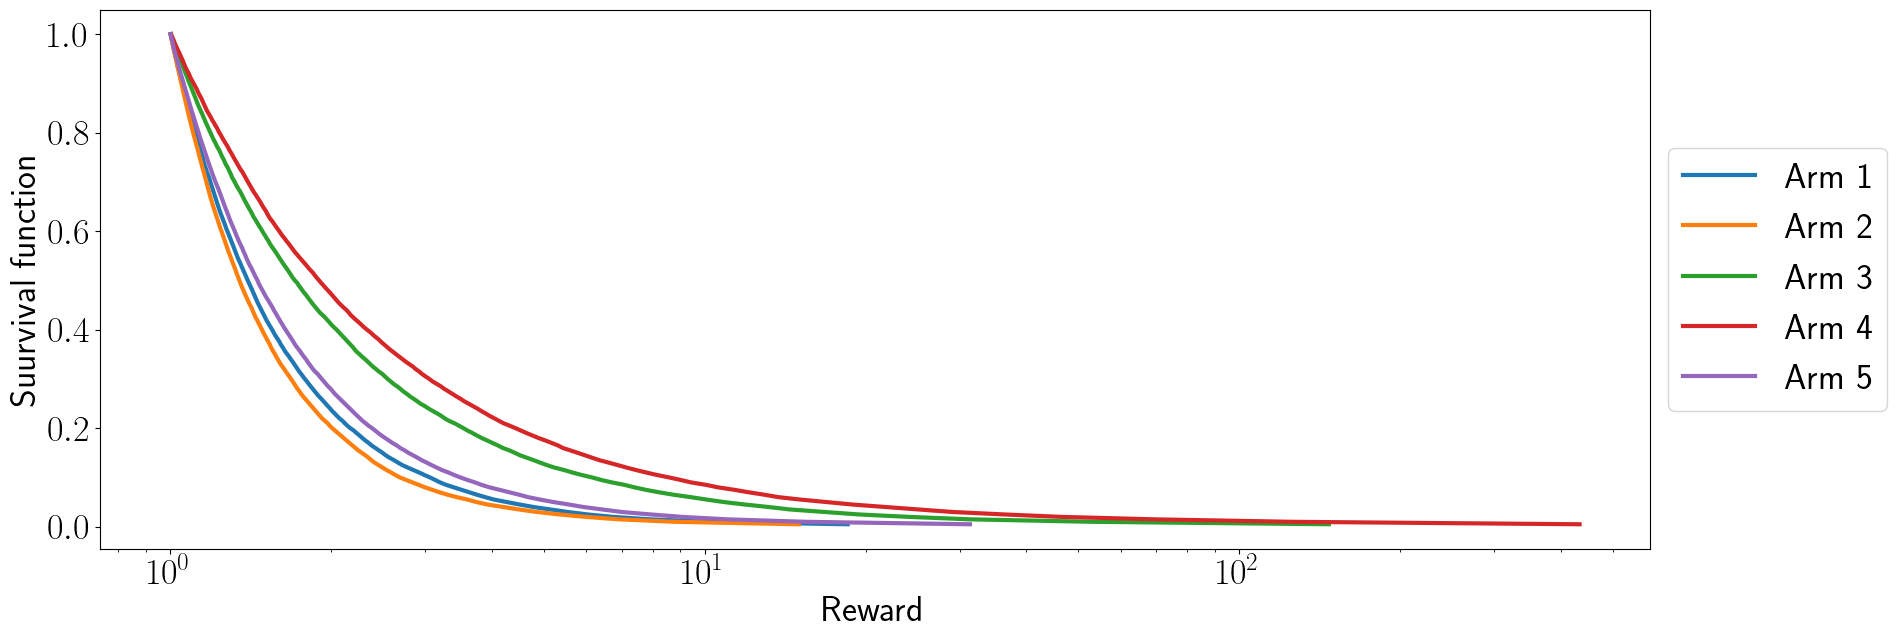

optimal arm =  3


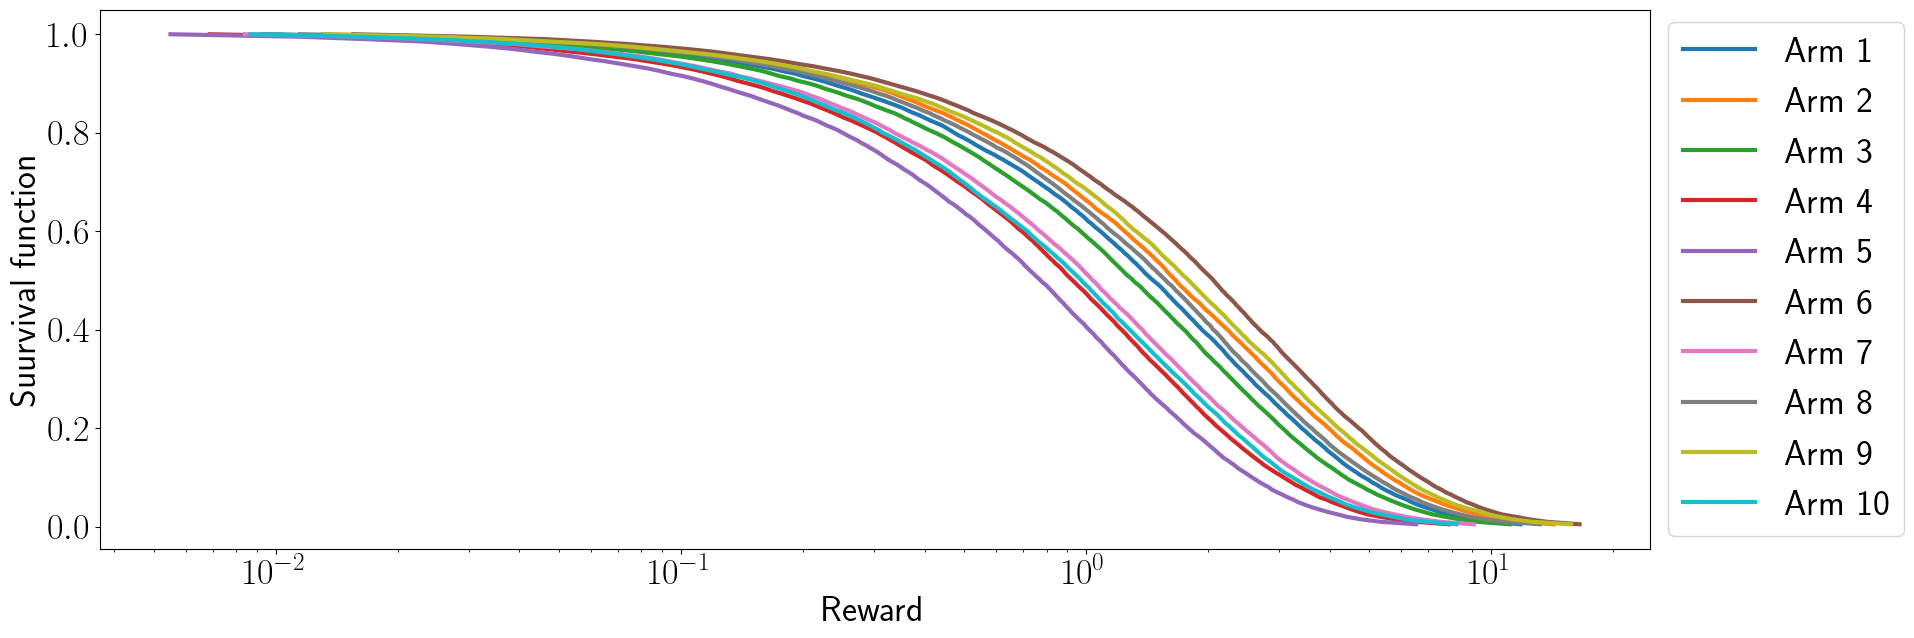

optimal arm =  5


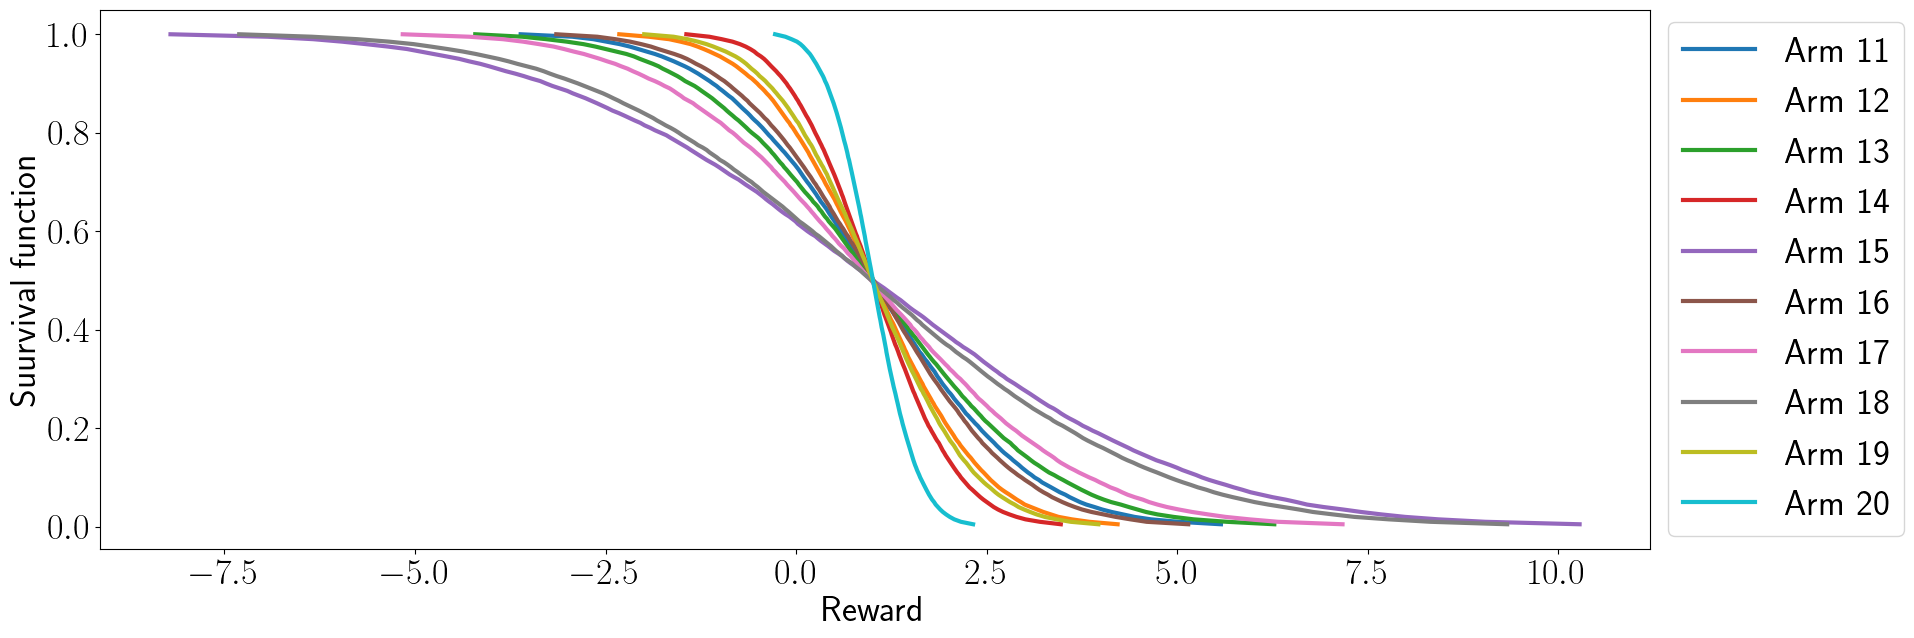

optimal arm =  4


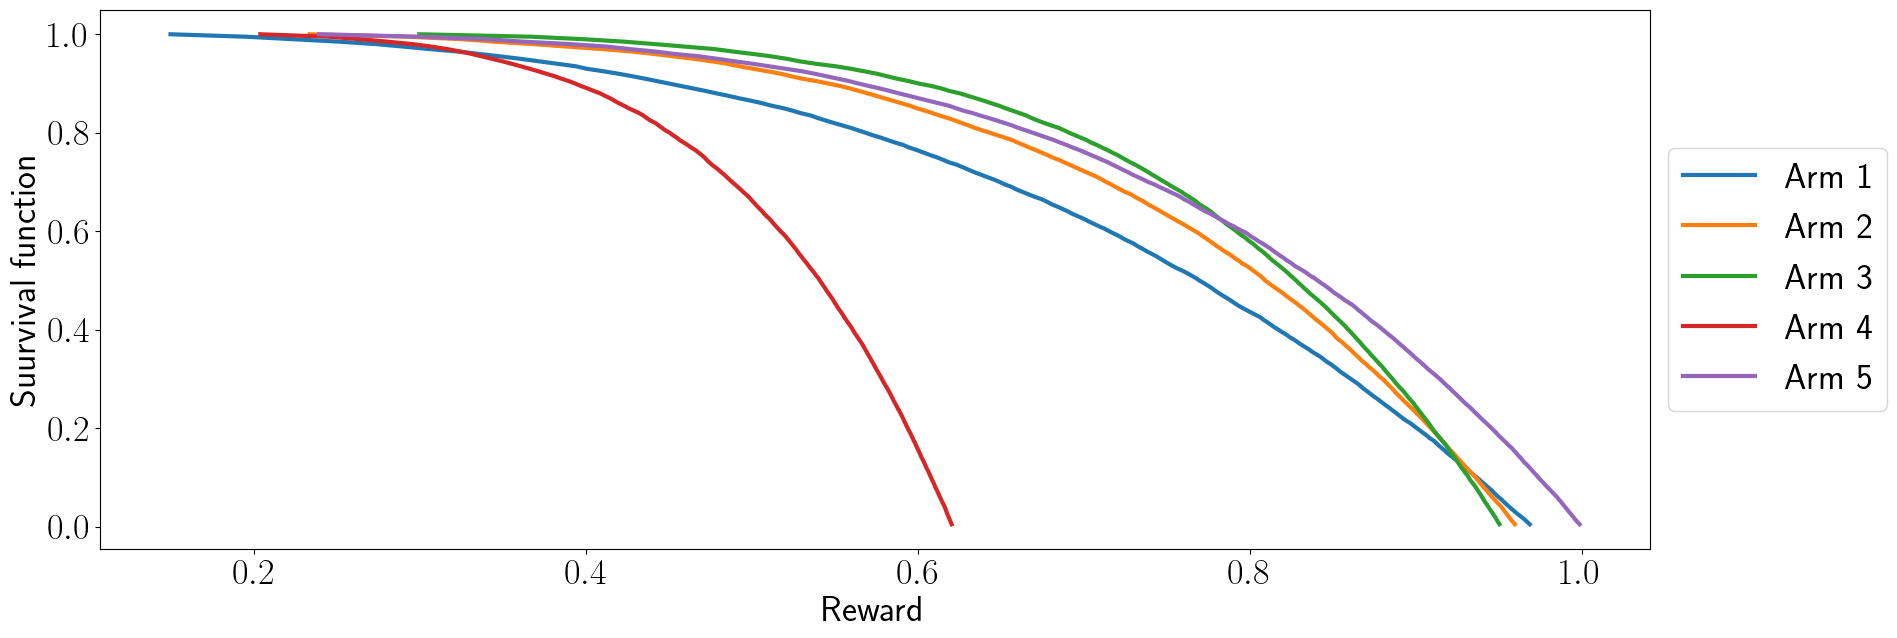

optimal arm =  4


In [6]:

xscale = [
    1,
    1,
    1,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
]

names_xp = ["xp" + str(i + 1) + "_" for i in range(11)]
index_list = [0, 2, 3, 10]
names_xp = [names_xp[index] for index in index_list]
xscale = [xscale[index] for index in index_list]
xp_list = [xp_list[index] for index in index_list]


optimal_arms = []
for xp_number, xp in enumerate(xp_list):
    model = GM(xp["arms"], xp["coef"])
    number_of_arms = len(model.MAB)
    rewards = np.zeros((Trials, number_of_arms, T))

    for trial in range(Trials):
        model = GM(xp["arms"], xp["coef"])
        for i, arm in enumerate(model.MAB):
            rewards[trial, i] = arm.sample(T)

    plt.rcParams["text.usetex"] = True
    # Fig size
    plt.rcParams["figure.figsize"] = 20, 7
    plt.rcParams.update({"font.size": 26})
    fig, ax = plt.subplots()

    list_of_cdfs = []
    for arm in range(number_of_arms):
        if number_of_arms > 10 and arm < 10:
            continue
        list_of_cdfs_arm = []
        for trial in range(Trials):
            list_of_cdfs_arm.append(np.sort(rewards[trial, arm, :].flatten()))

        data = np.mean(list_of_cdfs_arm, axis=0).flatten()

        list_of_cdfs.append(list_of_cdfs_arm)

        label = "Arm " + str(arm + 1)
        ax.plot(
            data,
            1-np.linspace(0, 1, len(data), endpoint=False),
            label=label,
            linewidth=3,
        )

    # axins.set_xlim(0.95, 1.05)
    plt.ylabel("Suurvival function")
    plt.xlabel("Reward")

    # plt.title(algorithms_data.algoirthm_names_dict[dataset_name])
    # plt.legend()
    # Put a legend below current axis
    if xscale[xp_number]:
        plt.xscale("log")
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.savefig(
        "./figures/" + names_xp[xp_number] + "arms_cdf.pdf",
        dpi=600,
        bbox_inches="tight",
    )
    plt.show()

    data = np.asarray(list_of_cdfs)
    expected_ext = np.mean(np.max(data, axis=2), axis=1)
    optimal_arm = np.argmax(expected_ext)
    print("optimal arm = ", optimal_arm)
    optimal_arms.append(optimal_arm)

In [ ]:
print(optimal_arms)